<a href="https://colab.research.google.com/github/hajdekd/Data-Science-Projects/blob/main/Dalibor_Hajdek_Ensemble_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background:
In this lab, we will build a model that predicts if someone who seeks a loan might be a defaulter or
a non-defaulter. Several independent variables will be involved to predict the target variable. The dataset covers
some information about the customers’ financial backgrounds. 

# Objectives:
* To predict those customers who might be a defaulter in paying back their loans
* Which features are the most important in the model-building process

# Data Description:
*  checking_balance
*  months_loan_duration
*  credit_history
*  purpose
*  amount
*  savings_balance
*  employment_duration
*  percent_of_income
*  years_at_residence
*  age
*  other_credit
*  housing
*  existing_loans_count
*  job
*  dependents
*  phone
*  default


# Importing libraries

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import re

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


# Loading Data

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
data = pd.read_csv('/content/drive/MyDrive/credit.csv')

# Exploring the Data (EDA)

In [ ]:
# Viewing first 5 rows of the dataset
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
# Viewing last 5 rows of the dataset
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [ ]:
#Getting the shape of the dataset
data.shape

(1000, 17)

Observation:

* The dataset has 1000 rows and 17 columns

In [ ]:
#Printing the columns 
print(data.columns)

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')


In [ ]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Observation:

* 10 varaibles are object type.
* 7 variables are int64 type.
* Target variable default is object type.
 

In [ ]:
#Checking the dataset for missing values
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

Observation:

* The dataset does not have any missing values.

### Fixing the data types

In [ ]:
#Selecting columns all columns of datatype object
cols = data.select_dtypes(['object'])
cols.columns

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')

In [ ]:
#Converting object type into categorical variables
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
#Printing new data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

### Summary of numerical features 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0



Observation:



### Summary of categorical features



In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700



Observation:


### Looking at the unqiue values of all the categories

In [ ]:
cols_cat= data.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in checking_balance are :
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
**************************************************
Unique values in credit_history are :
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
**************************************************
Unique values in purpose are :
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
**************************************************
Unique values in savings_balance are :
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
**************************************************
Unique values in employment_duration are :
1 - 4 years    339
> 7 years      253
4

### Univariate analysis

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

Months Loan Duration

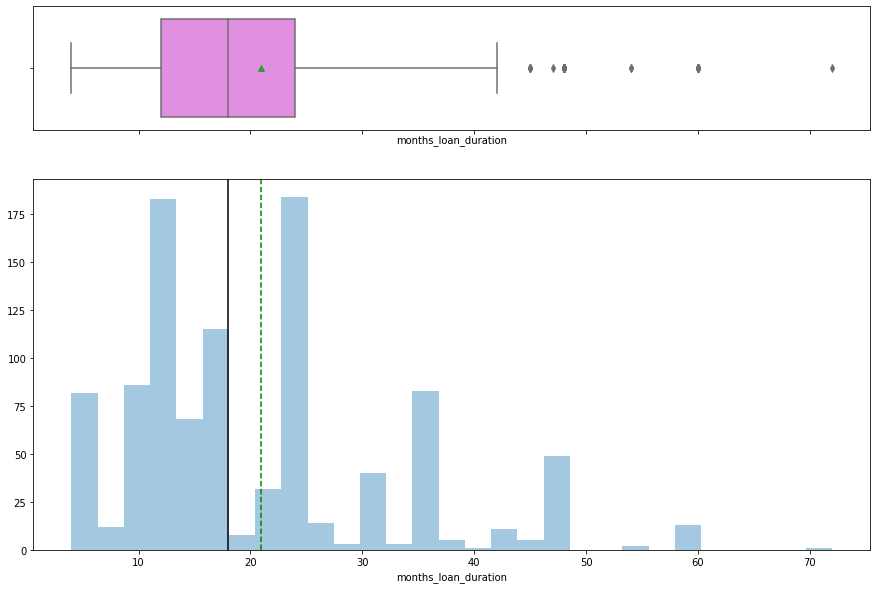

In [ ]:
histogram_boxplot(data['months_loan_duration'])

Observation:

* Most values for **months_loan_duration** varaible are ar 12 and 24, with some outliers on the right side of the graph. 

Amount

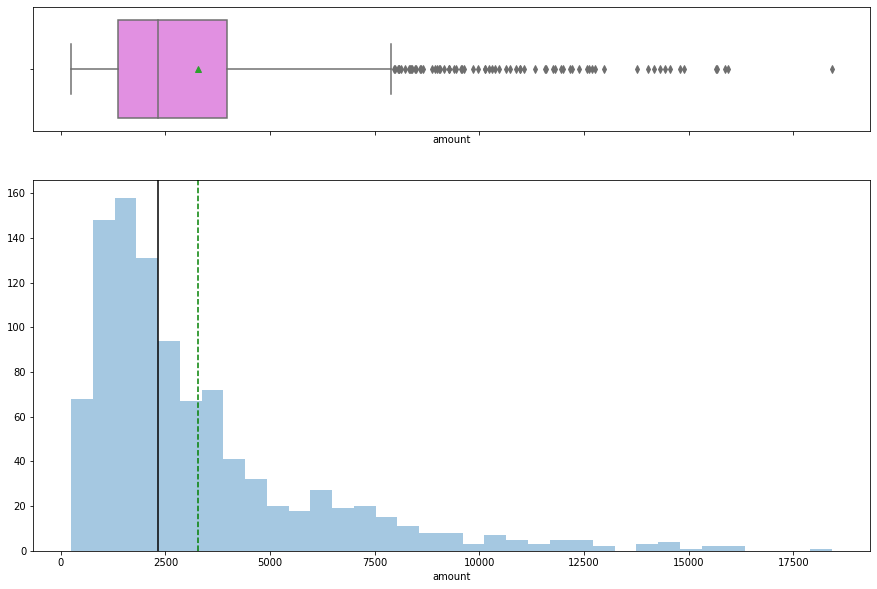

In [ ]:
histogram_boxplot(data['amount'])

Observation:

* **Amount** is right skewed.

Percent of Income

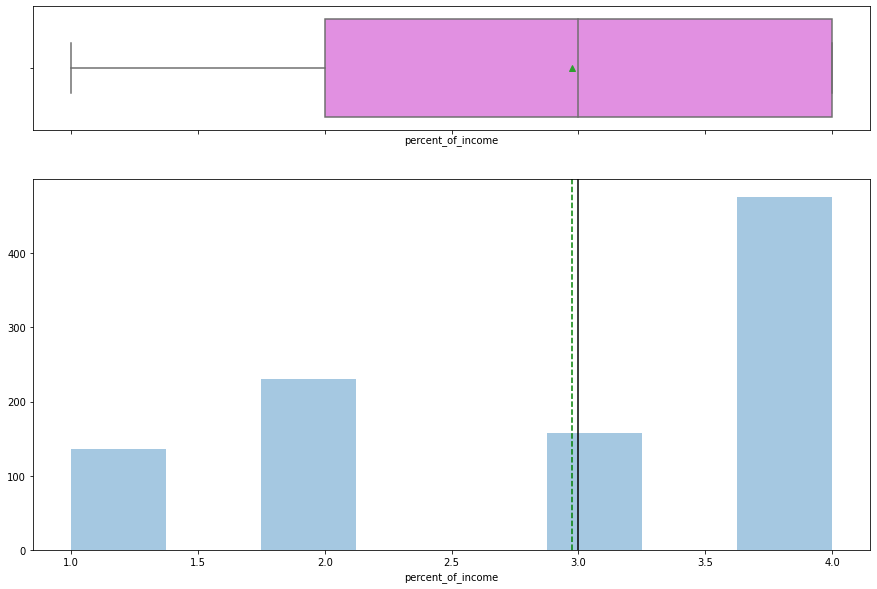

In [ ]:
histogram_boxplot(data['percent_of_income'])

Observation:

* For **Percent_of_income**, majority of values are at between 3.4 and 4, and around 2.

Years at Residence

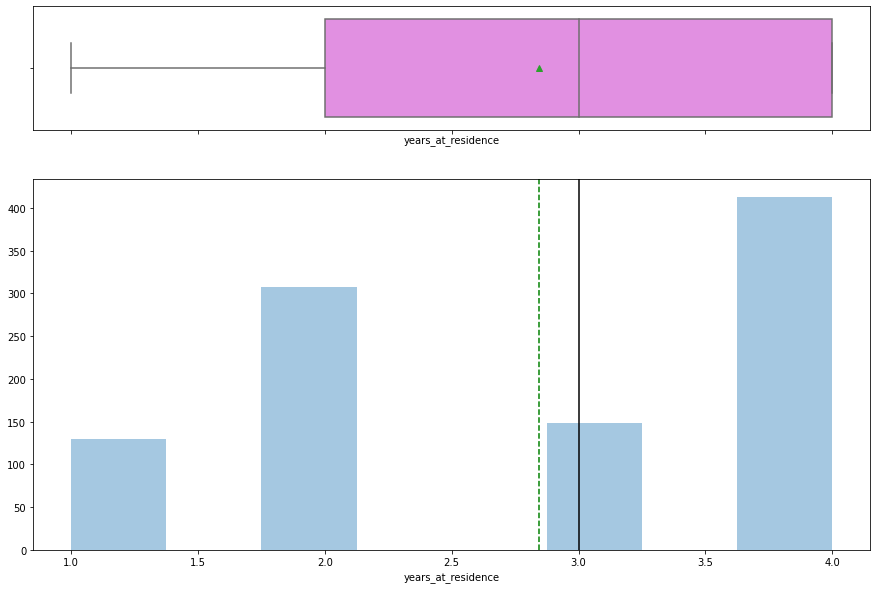

In [ ]:
histogram_boxplot(data['years_at_residence'])

Observation:

**Years_at_residence** has almost identical distribution as percent_of_income with slightly more values found around 2. 

Age

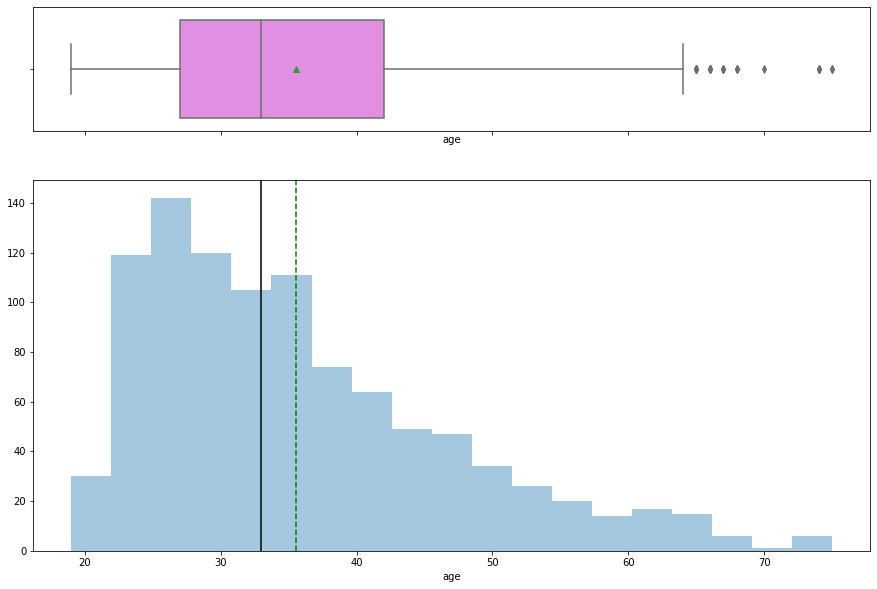

In [ ]:
histogram_boxplot(data['age'])

Observation: 

**Age** is right skewed.

Existing loans count

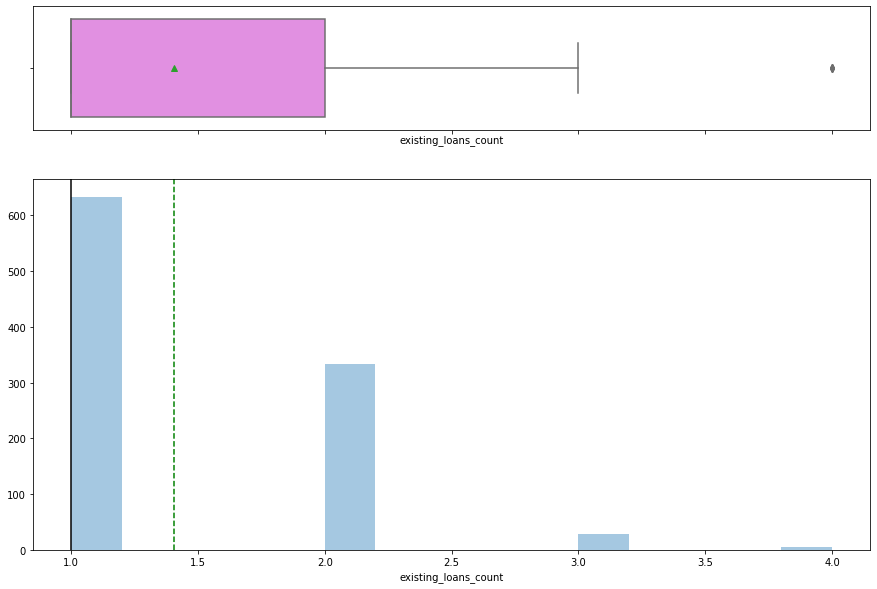

In [ ]:
histogram_boxplot(data['existing_loans_count'])

Observation:

**Existing_loans_count** is right skewed. 

Dependents

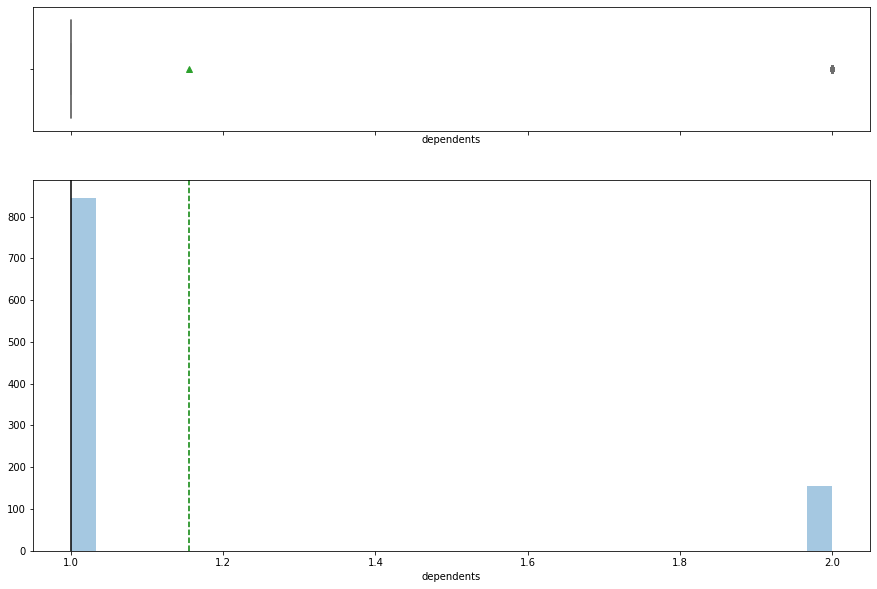

In [ ]:
histogram_boxplot(data['dependents'])

Observation:

* Most customers in the dataset have 1 dependent. 

### Categorical Features

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

Checking balance

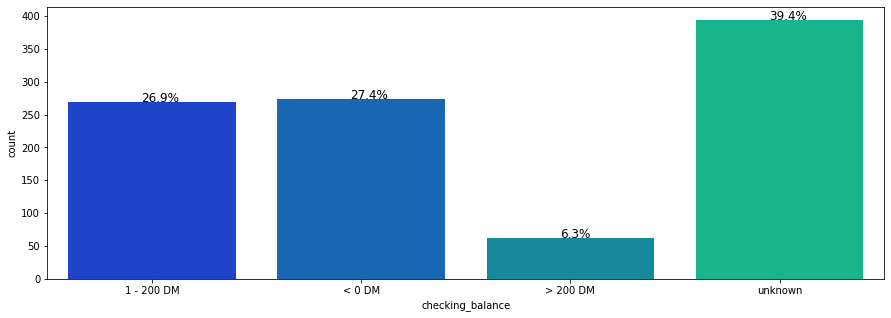

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["checking_balance"],palette='winter')
perc_on_bar(ax,data["checking_balance"])

Observation:

* Almost 40% of the clients have unknown **checking_balance**.

Credit history

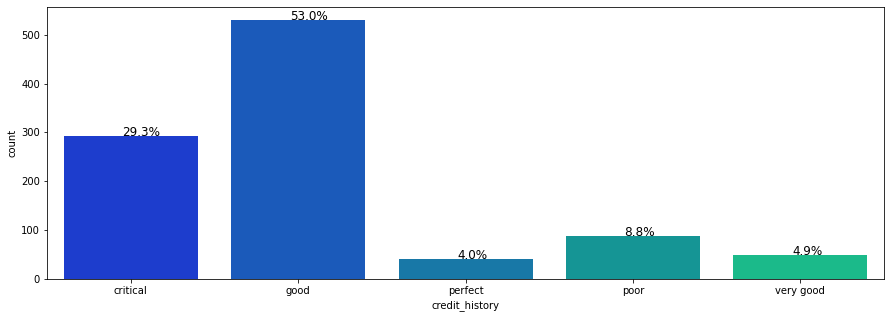

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["credit_history"],palette='winter')
perc_on_bar(ax,data["credit_history"])

Observation: 

* 53% of hte clients in the dataset have Good **credit_history**. 

Purpose

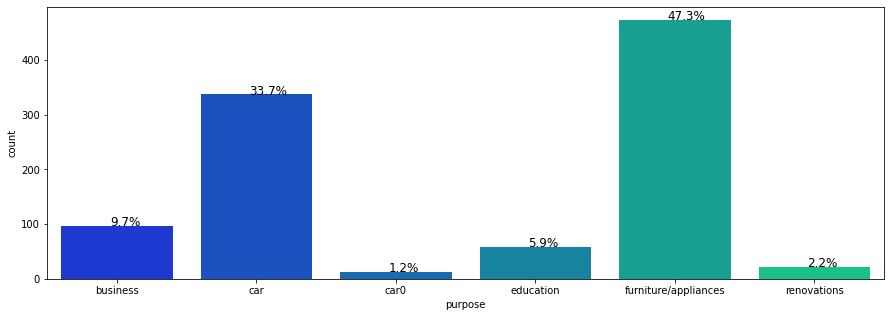

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["purpose"],palette='winter')
perc_on_bar(ax,data["purpose"])

Observation:

* For 47.3% of the clients in the dataset, the **purpose** of the loan is furniture/appliences. 

Savings balance

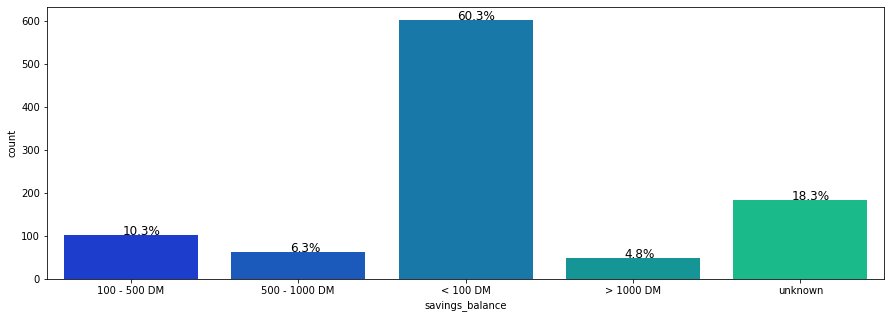

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["savings_balance"],palette='winter')
perc_on_bar(ax,data["savings_balance"])

Observation:

* 60.3% of the clients in the dataset have less than 100DM of saving_balance.

Employment duratio

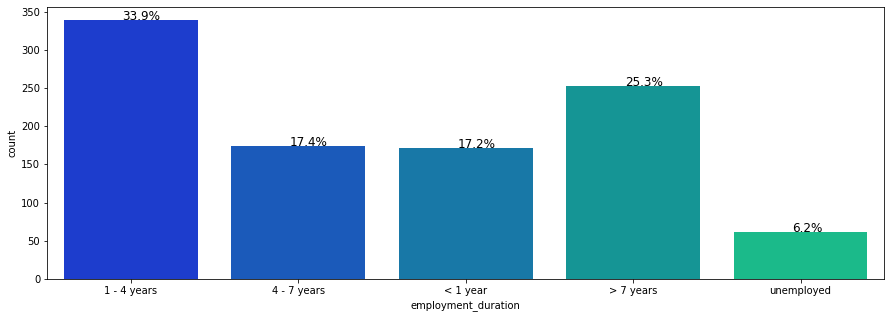

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["employment_duration"],palette='winter')
perc_on_bar(ax,data["employment_duration"])

Observation:

* Almost 34% of the clients in the dataset have 1-4 years of **employment**.

Other credit

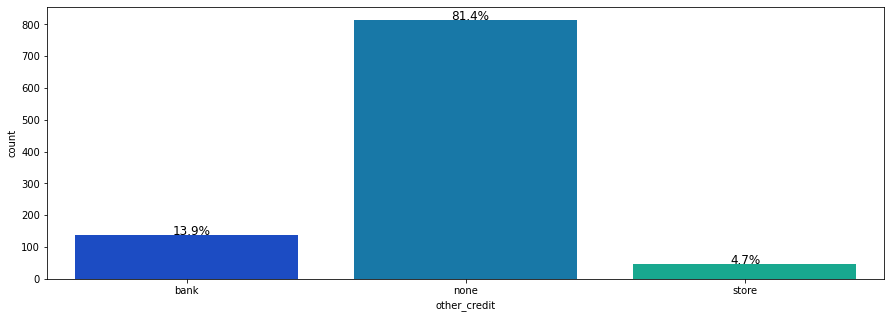

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["other_credit"],palette='winter')
perc_on_bar(ax,data["other_credit"])

Observation:

* 81.4 the clients in the dataset have **other_credit**.

Housing

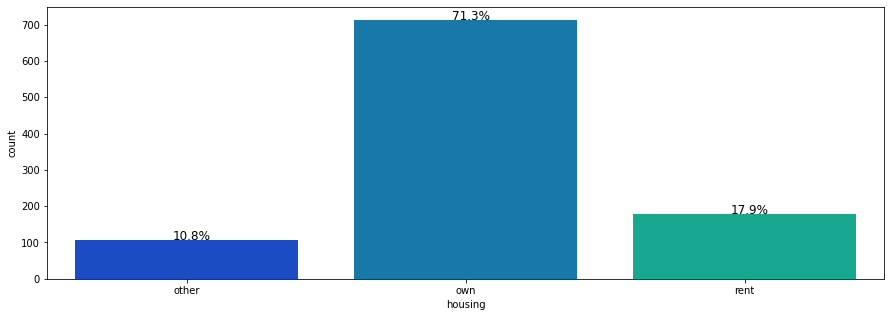

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["housing"],palette='winter')
perc_on_bar(ax,data["housing"])

Observation:

* 71.3% of the consumers in the dataset own the houses. 

Job

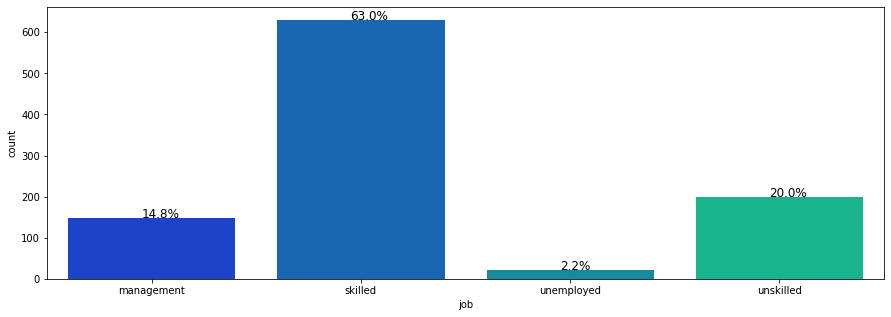

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["job"],palette='winter')
perc_on_bar(ax,data["job"])

Observation:

* 63% of the clients in the dataset are categorized as skilled.

Phone

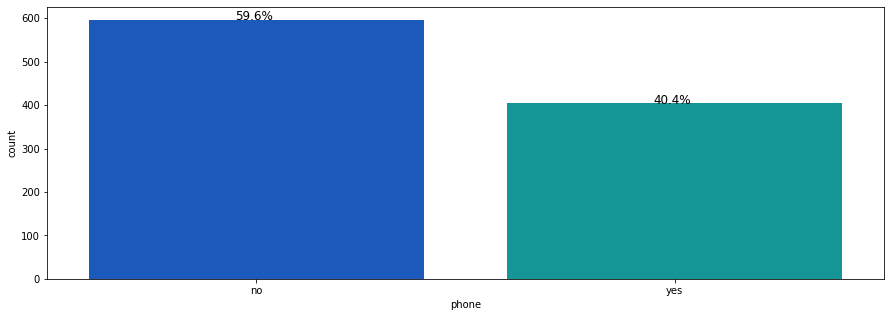

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["phone"],palette='winter')
perc_on_bar(ax,data["phone"])

Observation:

* Almost 60% of the clients in the dataset do not use phone for the online banking.

Default (Target Varaible) 

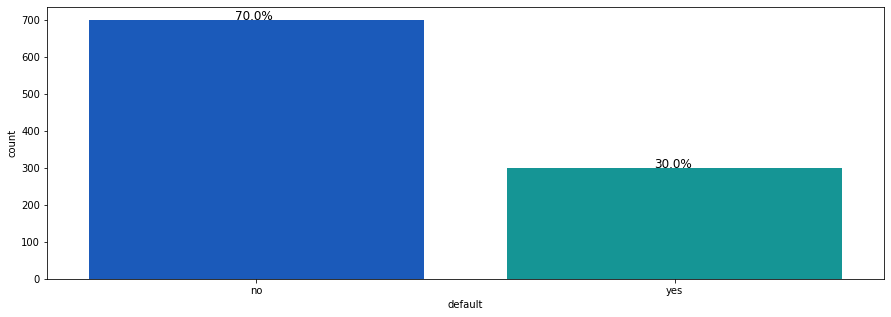

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["default"],palette='winter')
perc_on_bar(ax,data["default"])

Observation:

* 70% of clients in the dataset did not default on their previous loans. 

## Bivariate Analysis

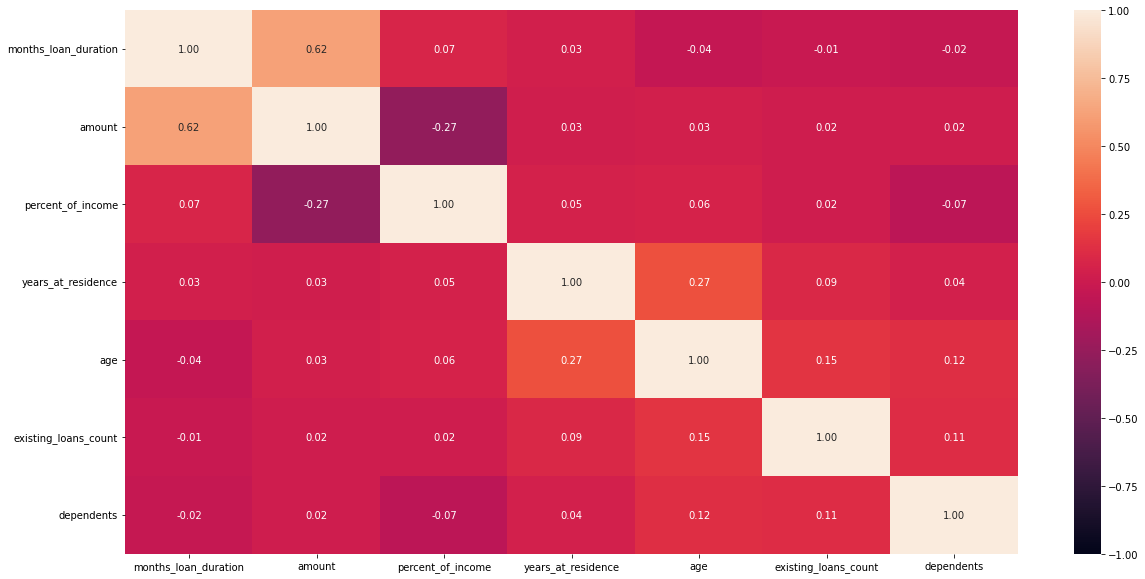

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

Observation:

* Amount and months_loan_duration have the highest correlation followed by age and years_at_residence.
* Amount and percent_of_income have the most negative correlation.


Default vs Months_loan_duration, Years_at_residence and age

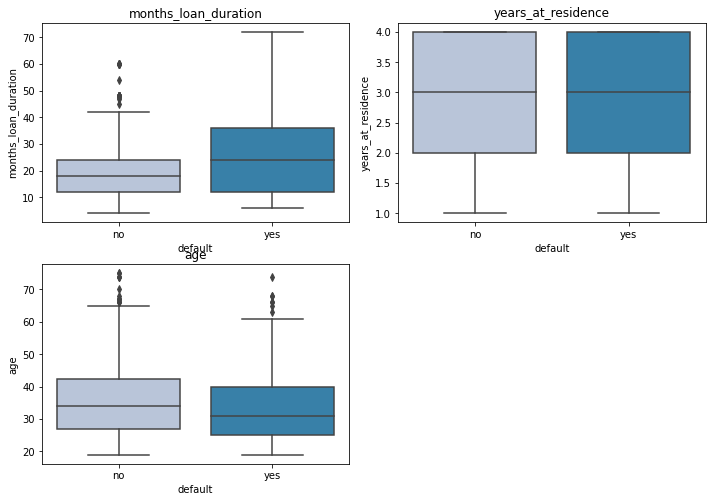

In [ ]:
cols = data[['months_loan_duration','years_at_residence','age']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["default"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

Observation:

* •	Customers with longer loan duration default more than those with shorter term loans.

Default vs Amount, Percent_of_income, Existing_loans_count and Dependents 

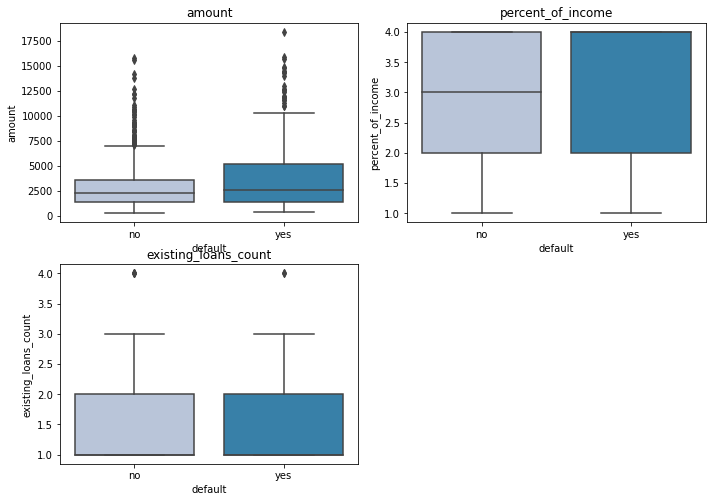

In [ ]:
cols = data[['amount','percent_of_income','existing_loans_count']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["default"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

Observation:

* Customers with higher amount default more than those with lower amount. 

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['default'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['default'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Default vs Checking balance

default            no  yes   All
checking_balance                
1 - 200 DM        164  105   269
< 0 DM            139  135   274
> 200 DM           49   14    63
unknown           348   46   394
All               700  300  1000
------------------------------------------------------------------------------------------------------------------------


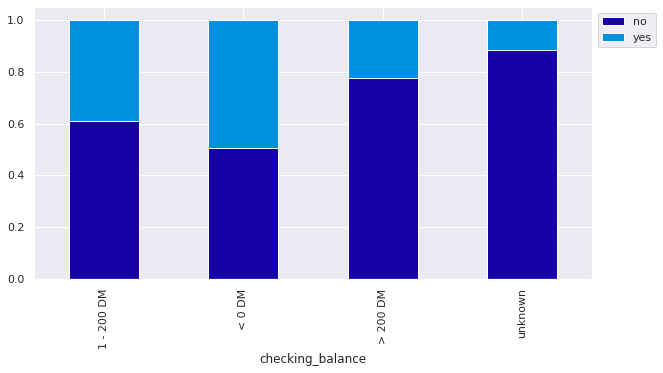

In [ ]:
stacked_plot(data['checking_balance'])

Observation:

* Customers with less than 0 DM in checking balance default more than those with other amounts, including those with unknown balance. 

Default vs Credit history

default          no  yes   All
credit_history                
critical        243   50   293
good            361  169   530
perfect          15   25    40
poor             60   28    88
very good        21   28    49
All             700  300  1000
------------------------------------------------------------------------------------------------------------------------


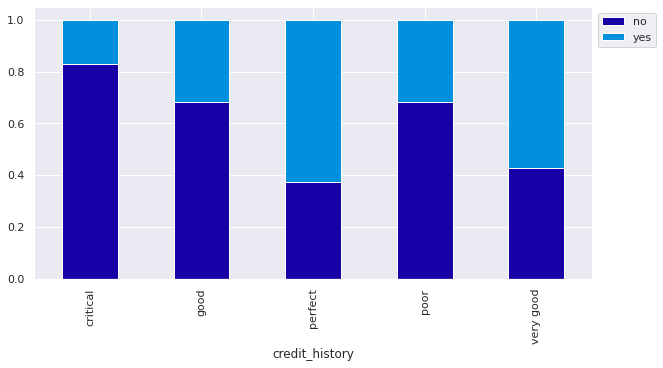

In [ ]:
stacked_plot(data['credit_history'])

Observation:

* Contrary to the expectaions, clients with the perfect and very good credit default more than those with good, poor and critical credit rating. 

Default vs Purpose

default                no  yes   All
purpose                             
business               63   34    97
car                   231  106   337
car0                    7    5    12
education              36   23    59
furniture/appliances  349  124   473
renovations            14    8    22
All                   700  300  1000
------------------------------------------------------------------------------------------------------------------------


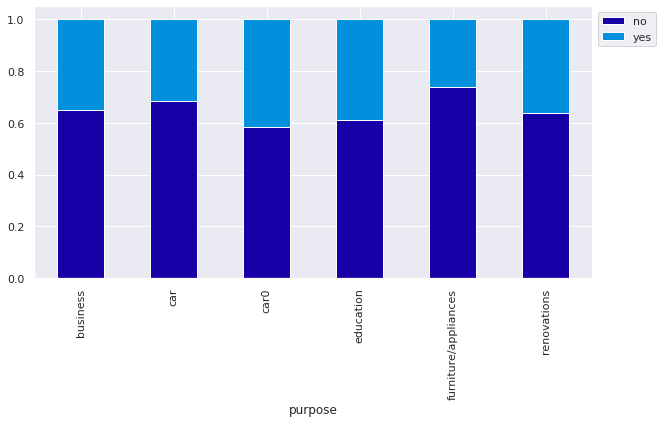

In [ ]:
stacked_plot(data['purpose'])

Observation:

* Customers with purpose to use loan on car0, education and car have higher default.

Default vs Savings Balance

default           no  yes   All
savings_balance                
100 - 500 DM      69   34   103
500 - 1000 DM     52   11    63
< 100 DM         386  217   603
> 1000 DM         42    6    48
unknown          151   32   183
All              700  300  1000
------------------------------------------------------------------------------------------------------------------------


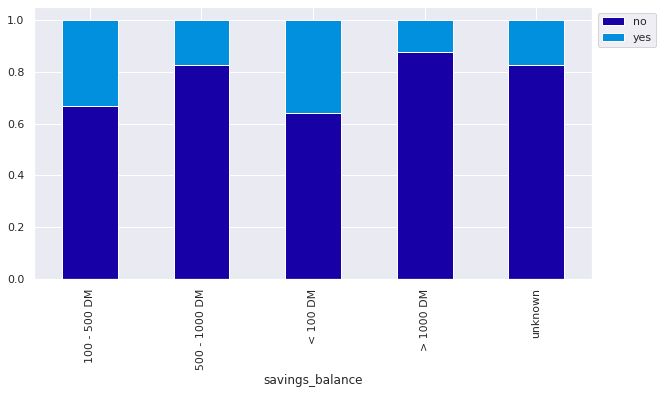

In [ ]:
stacked_plot(data['savings_balance'])


Observation:

* Customers with lower saving balance default more than those with higher balance. 


Default vs Employment duration

default               no  yes   All
employment_duration                
1 - 4 years          235  104   339
4 - 7 years          135   39   174
< 1 year             102   70   172
> 7 years            189   64   253
unemployed            39   23    62
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


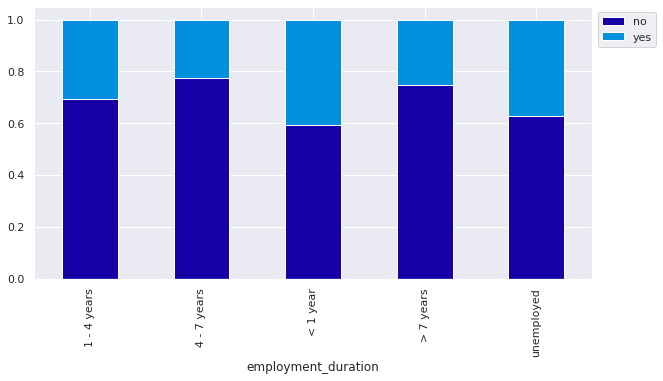

In [ ]:
stacked_plot(data['employment_duration'])

Observation:

* Customers employment duration less than a year default more than those in other categories. 


Default vs Other credit

default        no  yes   All
other_credit                
bank           82   57   139
none          590  224   814
store          28   19    47
All           700  300  1000
------------------------------------------------------------------------------------------------------------------------


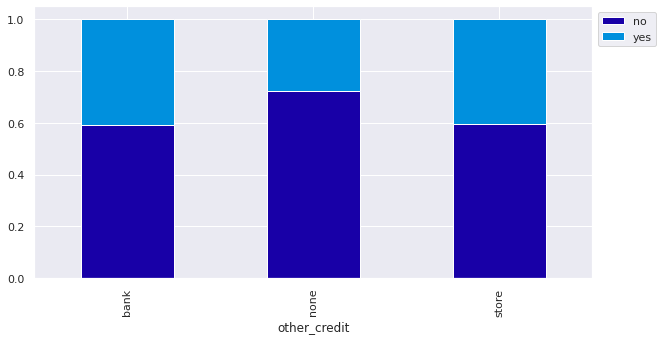

In [ ]:
stacked_plot(data['other_credit'])

Observation:

* Customers with no other credit default less than those with bank or store credits. 

Default vs Housing


default   no  yes   All
housing                
other     64   44   108
own      527  186   713
rent     109   70   179
All      700  300  1000
------------------------------------------------------------------------------------------------------------------------


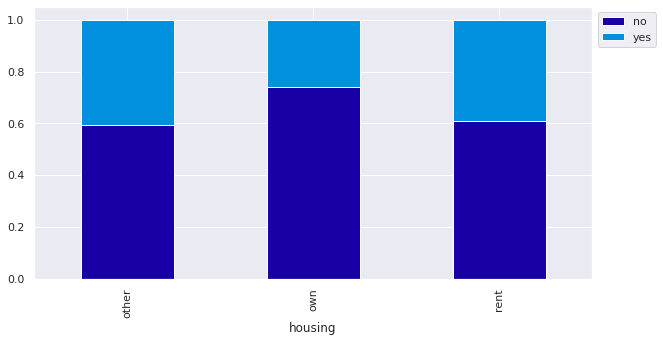

In [ ]:
stacked_plot(data['housing'])

Observation:

* Customers who own default less than those who rent or other status for housing. 

Default vs Job

default      no  yes   All
job                       
management   97   51   148
skilled     444  186   630
unemployed   15    7    22
unskilled   144   56   200
All         700  300  1000
------------------------------------------------------------------------------------------------------------------------


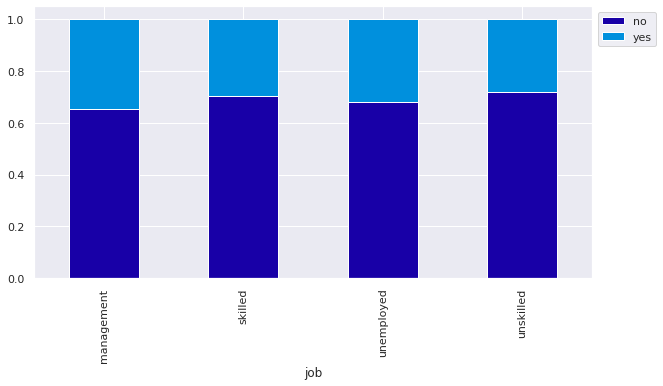

In [ ]:
stacked_plot(data['job'])

Observation:

* It appears that clients in managment default slightly more than those in other categories. 

Default vs Phone

default   no  yes   All
phone                  
no       409  187   596
yes      291  113   404
All      700  300  1000
------------------------------------------------------------------------------------------------------------------------


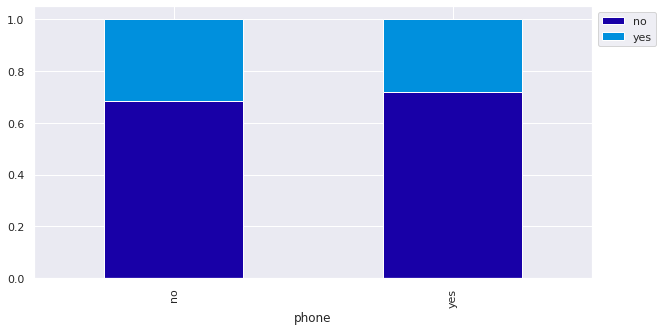

In [ ]:
stacked_plot(data['phone'])

* Customers who do not use phone default slightlymore than those who do. 

## Summary of EDA

**Data Description:**

*	The dataset consists 1000 rows and 17 columns.
*   10 variables are of **object** type and 7 of **int64** type.
* There are no missing values in the dataset. 

**EDA Observations:**

* Customers with longer loan duration default more than those with shorter term  loans.
* Customers with higher amount default more than those with lower amount.
* Clients with the perfect and very good credit default more than those with good, poor and critical credit rating.
* Customers with low checking and saving balance default more than those with higher balance, including those with unknown balance.
* Customers with employment duration less than a year default more than those with more tenure.


# Model Building

## Data Splitting

In [ ]:
# the lambda function: it's a quick one-liner function, 

X = data.drop(['default'],axis=1)
X = pd.get_dummies(X,drop_first=True) # drop the first column 
y = data['default'].apply(lambda x : 1 if x=='yes' else 0)

In [ ]:
#Removing characters from column names
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']','_>', '<'))) else col for col in X.columns.values]

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(700, 35) (300, 35)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   months_loan_duration             1000 non-null   int64
 1   amount                           1000 non-null   int64
 2   percent_of_income                1000 non-null   int64
 3   years_at_residence               1000 non-null   int64
 4   age                              1000 non-null   int64
 5   existing_loans_count             1000 non-null   int64
 6   dependents                       1000 non-null   int64
 7   checking_balance__ 0 DM          1000 non-null   uint8
 8   checking_balance_> 200 DM        1000 non-null   uint8
 9   checking_balance_unknown         1000 non-null   uint8
 10  credit_history_good              1000 non-null   uint8
 11  credit_history_perfect           1000 non-null   uint8
 12  credit_history_poor              1000 non-null   

In [ ]:
y.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.6733333333333333
Recall on training set :  1.0
Recall on test set :  0.37777777777777777
Precision on training set :  1.0
Precision on test set :  0.4473684210526316
F1-Score on training set :  1.0
F1-Score on test set :  0.40963855421686746


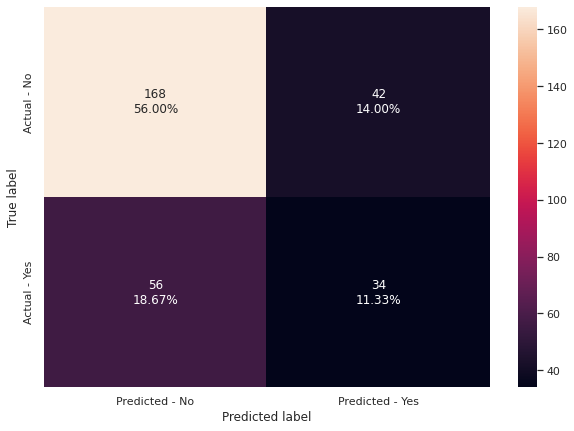

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

Observation:

* The model is overfiting the training data. 


###Decision Tree Classifier - Hyperparameter Tuning

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.30,1:0.70},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       random_state=1)

Accuracy on training set :  0.64
Accuracy on test set :  0.6366666666666667
Recall on training set :  0.8571428571428571
Recall on test set :  0.8444444444444444
Precision on training set :  0.44776119402985076
Precision on test set :  0.4444444444444444
F1-Score on training set :  0.5882352941176471
F1-Score on test set :  0.5823754789272031


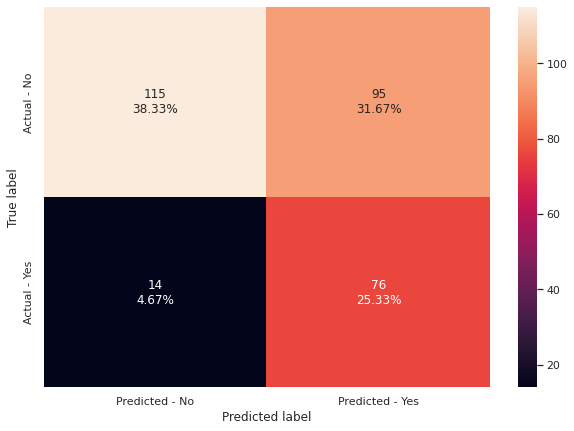

In [ ]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

Observation:

* The overfitting has reduced and F1 score on the test has increased. 

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.7633333333333333
Recall on training set :  1.0
Recall on test set :  0.34444444444444444
Precision on training set :  1.0
Precision on test set :  0.7209302325581395
F1-Score on training set :  1.0
F1-Score on test set :  0.4661654135338345


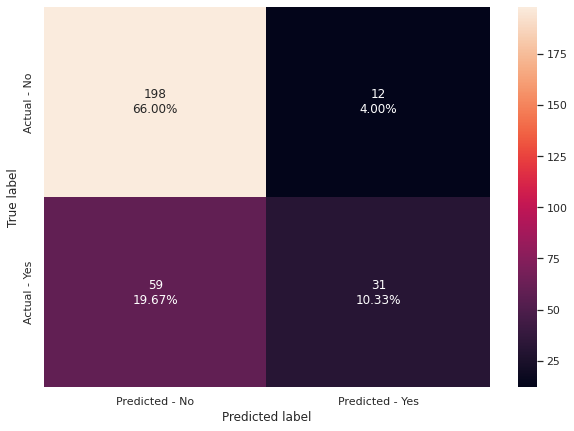

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

Observation:

* The model is overfitting on the training set and test F1 score decreased compared to the previous model. 

###Random Forest Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.30,1:0.70},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_features='sqrt', min_samples_leaf=6, n_estimators=50,
                       oob_score=True, random_state=1)

Accuracy on training set :  0.7871428571428571
Accuracy on test set :  0.75
Recall on training set :  0.7952380952380952
Recall on test set :  0.7555555555555555
Precision on training set :  0.6117216117216118
Precision on test set :  0.5619834710743802
F1-Score on training set :  0.6915113871635612
F1-Score on test set :  0.6445497630331755


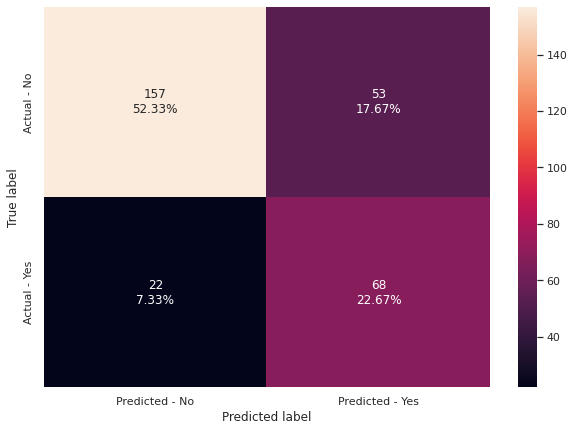

In [ ]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Observation:

* The overfitting is reduced and F1 score on the test is higher. 

## Bagging Classifier

Accuracy on training set :  0.9871428571428571
Accuracy on test set :  0.7166666666666667
Recall on training set :  0.9571428571428572
Recall on test set :  0.34444444444444444
Precision on training set :  1.0
Precision on test set :  0.543859649122807
F1-Score on training set :  0.9781021897810218
F1-Score on test set :  0.4217687074829932


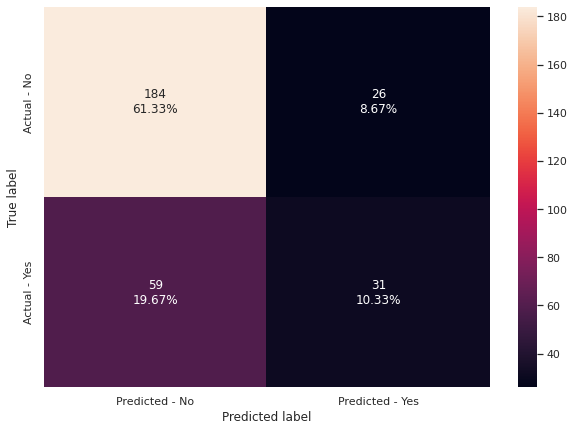

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

Obseravation:

* Precission on the training set is overfitting and F1 score on the test set is low.

###Bagging Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=20,
                  random_state=1)

Accuracy on training set :  0.9785714285714285
Accuracy on test set :  0.75
Recall on training set :  0.9285714285714286
Recall on test set :  0.3888888888888889
Precision on training set :  1.0
Precision on test set :  0.6363636363636364
F1-Score on training set :  0.962962962962963
F1-Score on test set :  0.4827586206896552


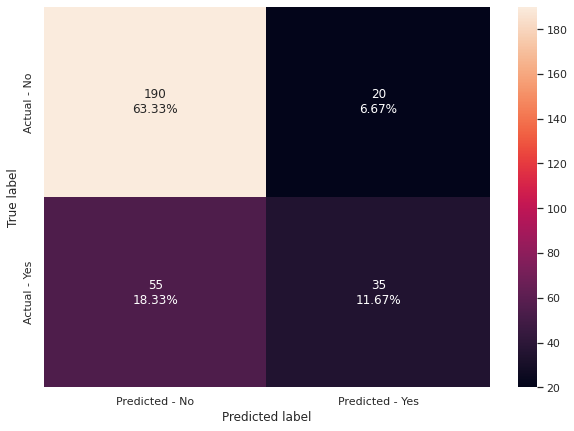

In [ ]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

Observation:

* After hyperparameter tuning of the model Precission on the training set is still overfitting, and F1 score on the test set has not incereased much.

## AdaBoost Classifier

Accuracy on training set :  0.8
Accuracy on test set :  0.74
Recall on training set :  0.5571428571428572
Recall on test set :  0.5222222222222223
Precision on training set :  0.7134146341463414
Precision on test set :  0.573170731707317
F1-Score on training set :  0.625668449197861
F1-Score on test set :  0.5465116279069768


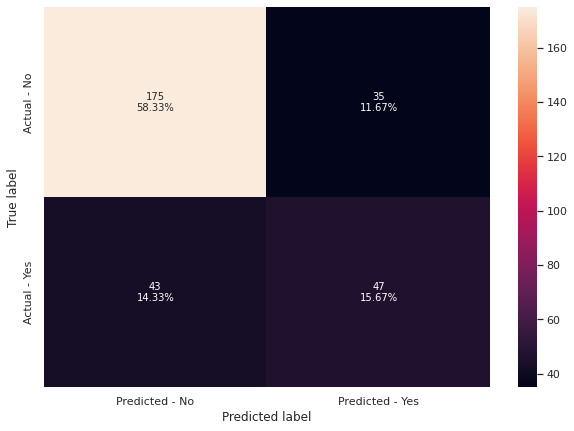

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

Observation:

* AdaBoost Classifier has not produced the best perrformance with F1 score on the test relatively low. 
 

###AdaBoost Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.7000000000000001, n_estimators=30,
                   random_state=1)

Accuracy on training set :  0.8742857142857143
Accuracy on test set :  0.7033333333333334
Recall on training set :  0.6857142857142857
Recall on test set :  0.4777777777777778
Precision on training set :  0.8674698795180723
Precision on test set :  0.5058823529411764
F1-Score on training set :  0.7659574468085107
F1-Score on test set :  0.4914285714285714


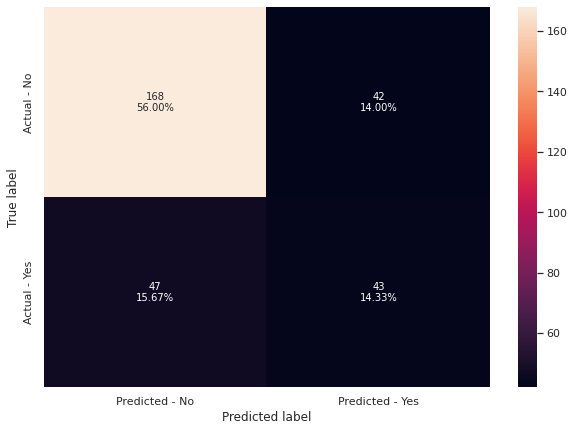

In [ ]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

Observation:

* After Hyperparameter Tuning of the AdaBoost Classifier F1 score on the test set actually has decreased. 

## Gradient Boosting Classifier

Accuracy on training set :  0.9085714285714286
Accuracy on test set :  0.7266666666666667
Recall on training set :  0.7380952380952381
Recall on test set :  0.37777777777777777
Precision on training set :  0.9451219512195121
Precision on test set :  0.5666666666666667
F1-Score on training set :  0.8288770053475936
F1-Score on test set :  0.4533333333333333


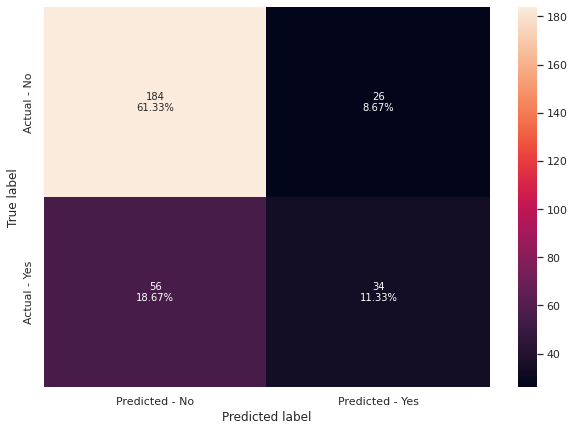

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

Observation: 

The F1 score on the test is low for Gradient Boosting Classifier.

###Gradient Boosting Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=1)

Accuracy on training set :  0.9742857142857143
Accuracy on test set :  0.75
Recall on training set :  0.919047619047619
Recall on test set :  0.4777777777777778
Precision on training set :  0.9948453608247423
Precision on test set :  0.6056338028169014
F1-Score on training set :  0.9554455445544555
F1-Score on test set :  0.5341614906832298


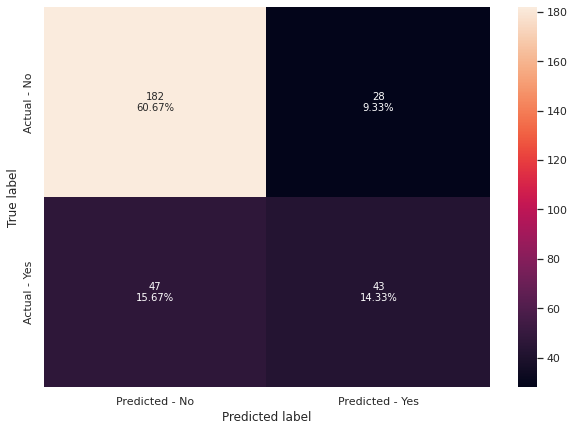

In [ ]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

Observation:

* After Hyperparameter Tuning of the Gradient Boosting Classifier F1 score on the test set has slightly increased. 

## XGBoost Classifier

Accuracy on training set :  0.88
Accuracy on test set :  0.7466666666666667
Recall on training set :  0.6523809523809524
Recall on test set :  0.4
Precision on training set :  0.9256756756756757
Precision on test set :  0.6206896551724138
F1-Score on training set :  0.76536312849162
F1-Score on test set :  0.4864864864864865


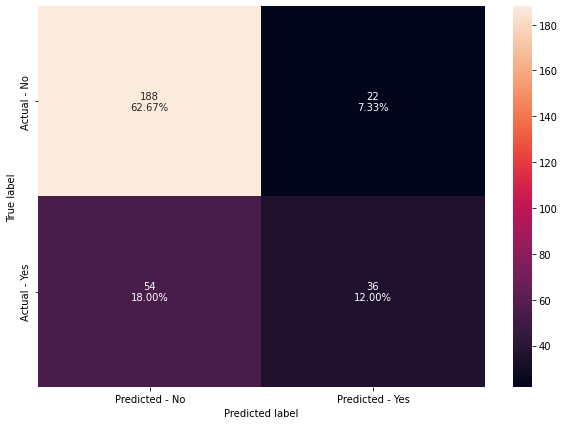

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

Observation:

* The F1 score on the test is low for XGBoost Classifier.

###XGBoost Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.7, eval_metric='logloss', learning_rate=0.2,
              n_estimators=50, random_state=1, scale_pos_weight=2,
              subsample=0.9)

Accuracy on training set :  0.8871428571428571
Accuracy on test set :  0.72
Recall on training set :  0.861904761904762
Recall on test set :  0.6222222222222222
Precision on training set :  0.7835497835497836
Precision on test set :  0.5283018867924528
F1-Score on training set :  0.8208616780045351
F1-Score on test set :  0.5714285714285715


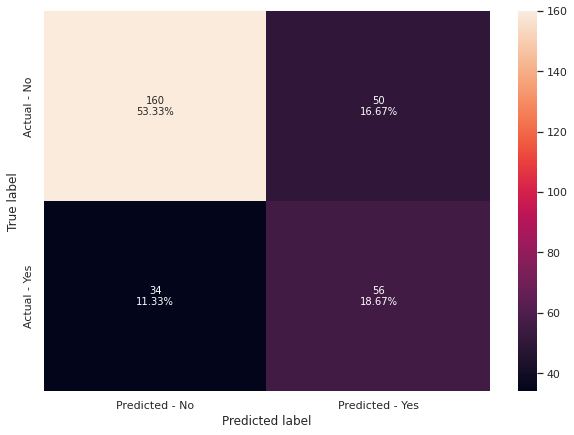

In [ ]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

Observation:

* •	After Hyperparameter Tuning of the XGBoost Classifier F1 score on the test set has increased, but not significantly. 

## Stacking Classifier

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_leaf=6,
                                                       n_estimators=50,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                      

Accuracy on training set :  0.8814285714285715
Accuracy on test set :  0.7166666666666667
Recall on training set :  0.8571428571428571
Recall on test set :  0.6777777777777778
Precision on training set :  0.7725321888412017
Precision on test set :  0.5213675213675214
F1-Score on training set :  0.8126410835214446
F1-Score on test set :  0.5893719806763286


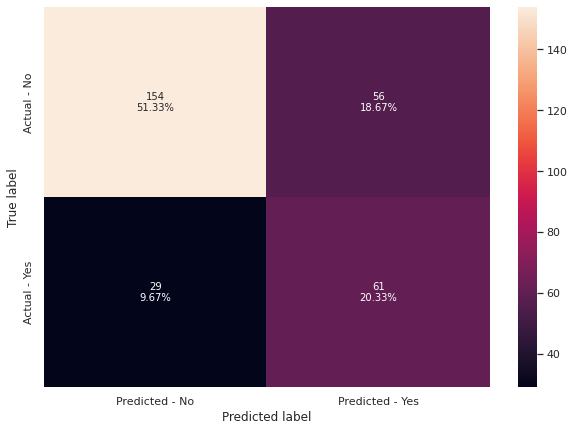

In [ ]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

Observation:

* Stacking Classifier has produced generalized performance compared to the other models. 

## Comparing all models

In [ ]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [ ]:

comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
3,Tuned Random Forest,0.787143,0.750000,0.795238,0.755556,0.611722,0.561983,0.691511,0.644550
12,Stacking Classifier,0.881429,0.716667,0.857143,0.677778,0.772532,0.521368,0.812641,0.589372
1,Tuned Decision Tree,0.640000,0.636667,0.857143,0.844444,0.447761,0.444444,0.588235,0.582375
11,Tuned XGBoost Classifier,0.887143,0.720000,0.861905,0.622222,0.783550,0.528302,0.820862,0.571429
6,AdaBoost Classifier,0.800000,0.740000,0.557143,0.522222,0.713415,0.573171,0.625668,0.546512
9,Tuned Gradient Boosting Classifier,0.974286,0.750000,0.919048,0.477778,0.994845,0.605634,0.955446,0.534161
7,Tuned AdaBoost Classifier,0.874286,0.703333,0.685714,0.477778,0.867470,0.505882,0.765957,0.491429
10,XGBoost Classifier,0.880000,0.746667,0.652381,0.400000,0.925676,0.620690,0.765363,0.486486
5,Bagging Classifier Tuned,0.978571,0.750000,0.928571,0.388889,1.000000,0.636364,0.962963,0.482759
2,Random Forest,1.000000,0.763333,1.000000,0.344444,1.000000,0.720930,1.000000,0.466165


Observation:

* Tuned Random Forest model produced highest test F1 Score
* Second best model according to the F1 Score on the test set is Stacking Classifier, but with lower accuracy on the test set.

### Feature importance of Tuned Random Forest

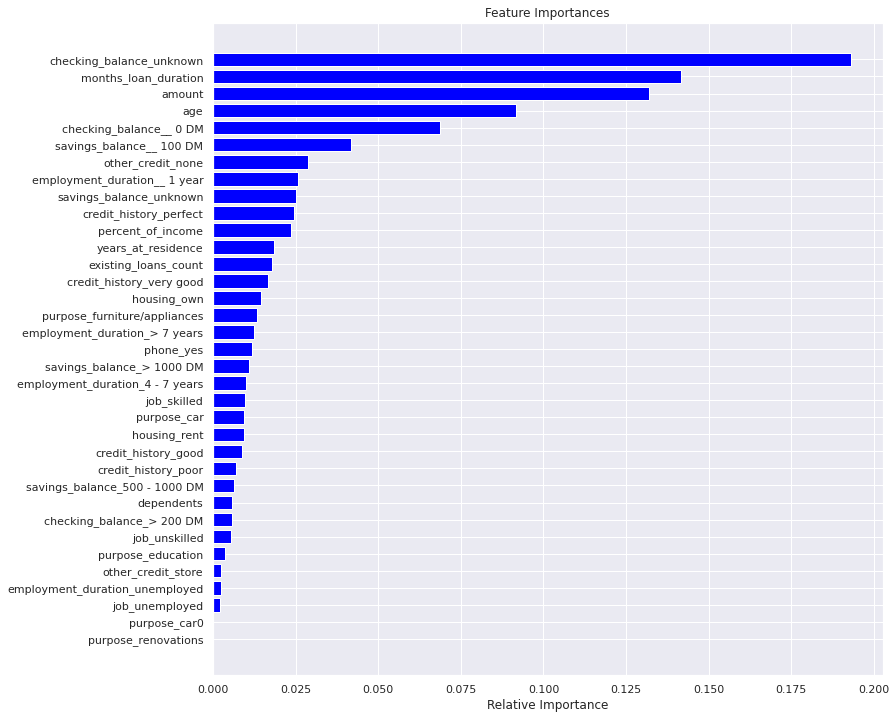

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:

* Based on the Tuned Random Forest model, checking_balance_unknown, months_loan_duration and amount are the 3 most important features in determining if customer would default or not.

#Conclusions: 

* Based on the heatmap, numerical variables with the highest correlation are amount and months_loan_duration. 
* The two with the lowest correlation are amount and percent_of_income. 
* Customers with longer **loan duration** default more than those with shorter term loans.
* Customers with higher **amount** default more than those with lower amount.
* In terms of **credit history**, customers with the perfect and very good credit rating default more than those with good, poor and critical credit rating.
* Customers with low **checking balance** and **saving balance** default more than those with higher balance, including those with unknown balance.
* Customers with **employment duration** less than a year default more than those with more tenure.
* Multiple models produced relatively low F1 Score on the test set, and some of the models overfit on the training set.
* According to F1 score on the test set, the best predicting model is Tuned Random Forest.
* Tuned Random Forest produced 0.645 on test F1 Score, 0.56 on Test Precision, and 0.75 on Test Accuracy. 
* Most important features for predicting if customer would default on repaying the loan are: **checking_balance_unknown**, followed by the **months_loan_duration** and **amount**.
